In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans


In [4]:
dataset=pd.read_csv("StudentsPerformance_modified.csv",encoding='latin1')
dataset.shape

(131114, 8)

In [5]:
dataset.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [6]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [14]:
mathIsDigit = pd.DataFrame(dataset['math score'].str.isdigit())


In [15]:
dataset[mathIsDigit['math score']==False]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
432,male,group C,high school,standard,none,?,56.0,55.0
433,female,group A,some high school,free/reduced,none,?,59.0,50.0
434,male,group C,some high school,standard,none,?,66.0,66.0
435,male,group C,some college,free/reduced,completed,?,48.0,53.0
436,male,group D,associate's degree,standard,none,?,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,?,66.0,73.0
65562,¢:Ø?â^ûÈH«TúqiéBÖå2ø``~WÖA¶N\tòL,á5.ÿï-hÀµ®Jº]mdiM÷Ë[t5%süøîÅy´A)äUÙa4...,ð'ù¯®Uø§#@çAÐ)§g3p~ÎâÅ¡\tæÌ©¨FNkÓjÏ¸È|È...,KÐMsðTÚÜ  µI8Nún+°ÌN(4 Wf:È}£[=Ì...,Ñá÷¸f.|FßÖ¶ê¼¼,úÀyÝìº¯60RC·y× :ÝØÙÛ,NaN,NaN
131098,¢:Ø?â^ûÈH«TúqiéBÖå2ø``~WÖA¶N\tòL,á5.ÿï-hÀµ®Jº]mdiM÷Ë[t5%süøîÅy´A)äUÙa4...,ð'ù¯®Uø§#@çAÐ)§g3p~ÎâÅ¡\tæÌ©¨FNkÓjÏ¸È|È...,KÐMsðTÚÜ  µI8Nún+°ÌN(4 Wf:È}£[=Ì...,Ñá÷¸f.|FßÖ¶ê¼¼,úÀyÝìº¯60RC·y× :ÝØÙÛ,NaN,NaN


In [16]:
dataset=dataset.replace('?',np.nan)

In [18]:
dataset=dataset.replace('úÀyÝìº¯60RC·y×:ÝØÙÛ',np.nan)
dataset[mathIsDigit['math score']==False]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
432,male,group C,high school,standard,none,NaN,56.0,55.0
433,female,group A,some high school,free/reduced,none,NaN,59.0,50.0
434,male,group C,some high school,standard,none,NaN,66.0,66.0
435,male,group C,some college,free/reduced,completed,NaN,48.0,53.0
436,male,group D,associate's degree,standard,none,NaN,68.0,64.0
437,male,group D,associate's degree,free/reduced,none,NaN,66.0,73.0
65562,¢:Ø?â^ûÈH«TúqiéBÖå2ø``~WÖA¶N\tòL,á5.ÿï-hÀµ®Jº]mdiM÷Ë[t5%süøîÅy´A)äUÙa4...,ð'ù¯®Uø§#@çAÐ)§g3p~ÎâÅ¡\tæÌ©¨FNkÓjÏ¸È|È...,KÐMsðTÚÜ  µI8Nún+°ÌN(4 Wf:È}£[=Ì...,Ñá÷¸f.|FßÖ¶ê¼¼,NaN,NaN,NaN
131098,¢:Ø?â^ûÈH«TúqiéBÖå2ø``~WÖA¶N\tòL,á5.ÿï-hÀµ®Jº]mdiM÷Ë[t5%süøîÅy´A)äUÙa4...,ð'ù¯®Uø§#@çAÐ)§g3p~ÎâÅ¡\tæÌ©¨FNkÓjÏ¸È|È...,KÐMsðTÚÜ  µI8Nún+°ÌN(4 Wf:È}£[=Ì...,Ñá÷¸f.|FßÖ¶ê¼¼,NaN,NaN,NaN


In [19]:
labelencoder=LabelEncoder()
dataset_new=dataset.copy()
dataset_new['parental level of education']=labelencoder.fit_transform(dataset_new['parental level of education'])
dataset_new["test preparation course"] = labelencoder.fit_transform(dataset_new["test preparation course"])
dataset_new["lunch"] = labelencoder.fit_transform(dataset_new["lunch"])

In [20]:
dataset_new.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,5,3,2,72,72.0,74.0
1,female,group C,9,3,1,69,90.0,88.0
2,female,group B,8,3,2,90,95.0,93.0
3,male,group A,4,1,2,47,57.0,44.0
4,male,group C,9,3,2,76,78.0,75.0


In [22]:
dataset_new.isnull().sum()

gender                              2
race/ethnicity                 130596
parental level of education         0
lunch                               0
test preparation course             0
math score                     130690
reading score                  130677
writing score                  130678
dtype: int64

In [28]:
!pip install missingno

import missingno as msno


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import missingno as msno

<Axes: >

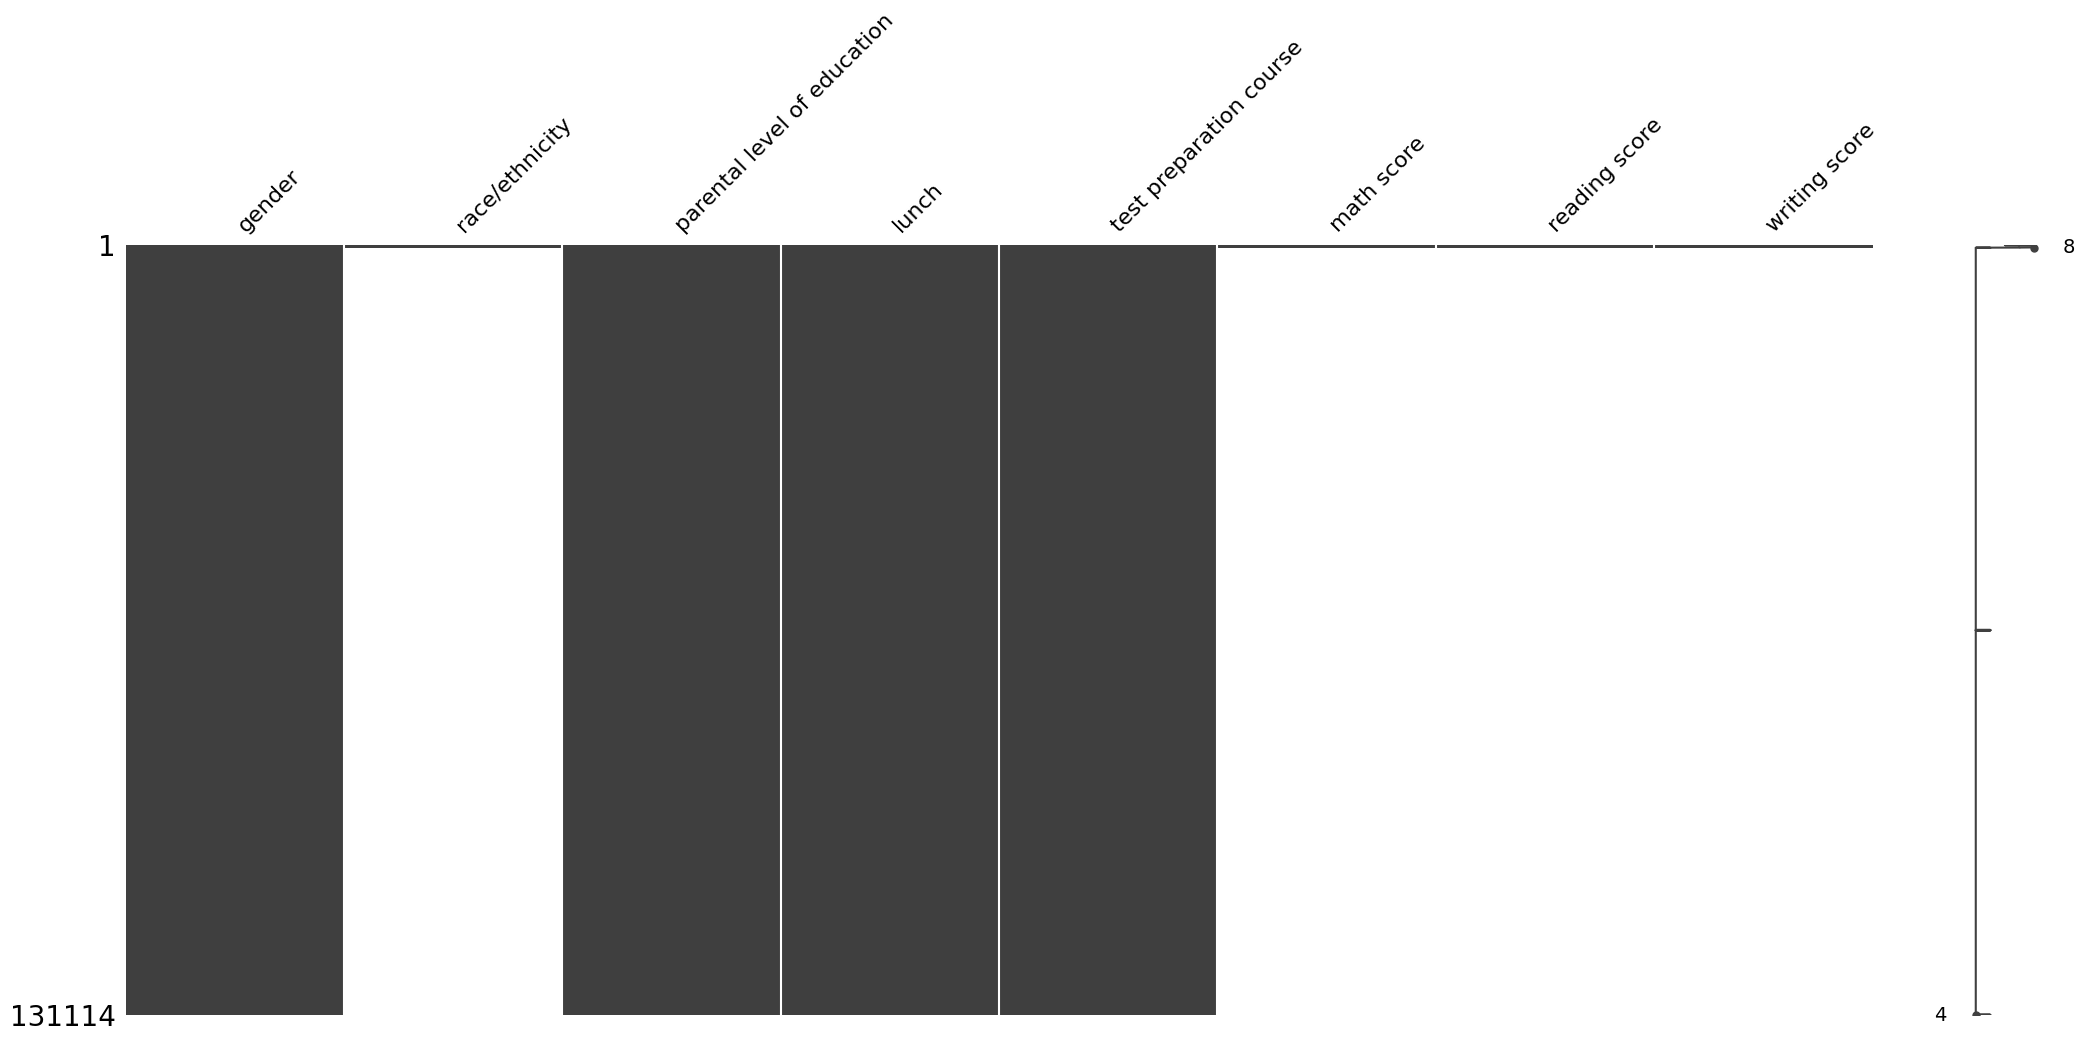

In [30]:
msno.matrix(dataset_new)

In [31]:
dataset_new.describe()

,parental level of education,lunch,test preparation course,reading score,writing score
count,131114.000000,131114.000000,131114.000000,437.000000,436.000000
mean,20.950982,5.987507,3.992083,65.608696,66.857798
std,0.838230,0.221480,0.139125,18.790009,15.364924
min,0.000000,0.000000,0.000000,3.000000,10.000000
25%,21.000000,6.000000,4.000000,56.000000,56.750000
50%,21.000000,6.000000,4.000000,68.000000,68.000000
75%,21.000000,6.000000,4.000000,78.000000,77.000000
max,21.000000,6.000000,4.000000,100.000000,100.000000


In [32]:
dataset_new['math score'].str.isdigit().count()

np.int64(424)

In [33]:
dataset_new.dtypes

gender                          object
race/ethnicity                  object
parental level of education      int64
lunch                            int64
test preparation course          int64
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [34]:
numeric_cols=['test preparation course','math score','reading score','writing score']
medianfiller=lambda x: x.fillna(x.median())
dataset_new['math score']=dataset_new['math score'].astype('float64')

C:\Users\tanay\AppData\Local\Temp\ipykernel_20292\4255176207.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new["writing score"])


<Axes: xlabel='writing score', ylabel='Density'>

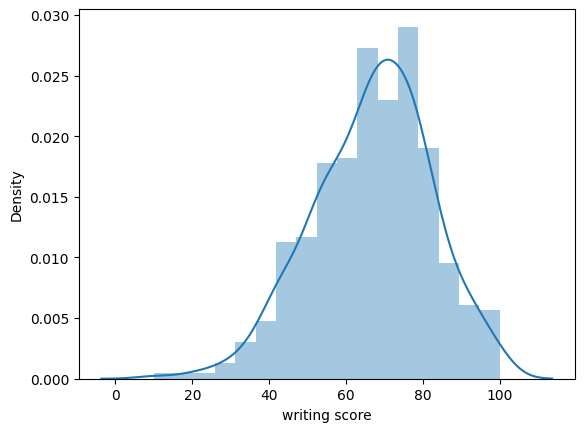

In [36]:
import seaborn as sns

sns.distplot(dataset_new["writing score"])

In [37]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

In [40]:
dataset_new[['writing score']] = s.fit_transform(dataset_new[['writing score']])

C:\Users\tanay\AppData\Local\Temp\ipykernel_20292\1248051489.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_new["writing score"])


<Axes: xlabel='writing score', ylabel='Density'>

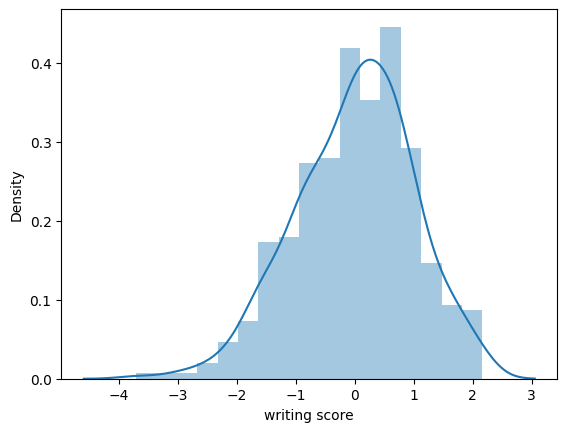

In [41]:
sns.distplot(dataset_new["writing score"])

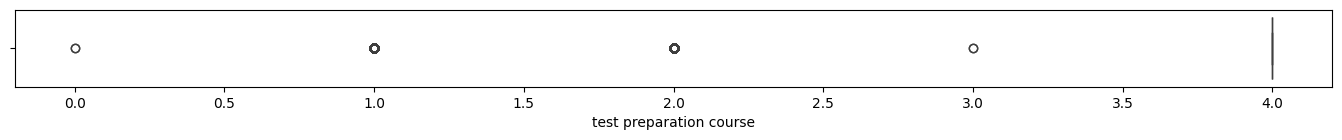

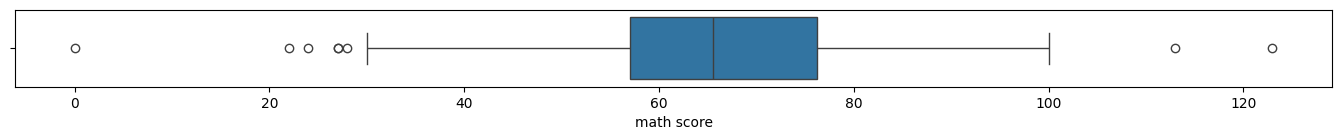

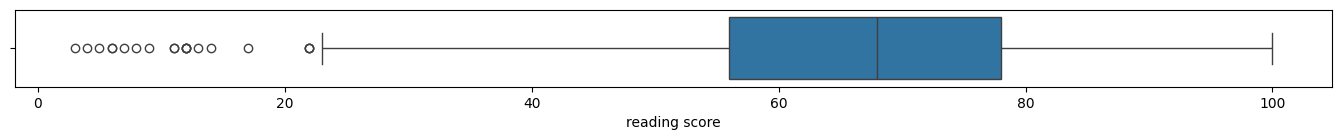

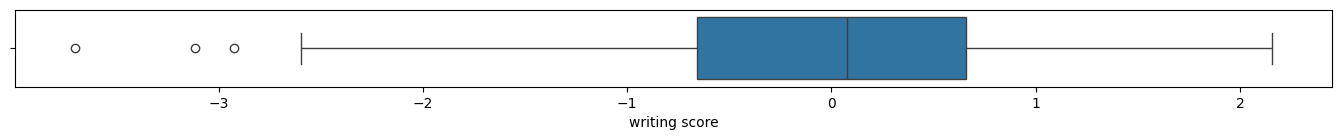

In [43]:
for column in numeric_cols:
    plt.figure(figsize=(17,1))
    sns.boxplot(data=dataset_new, x=column)

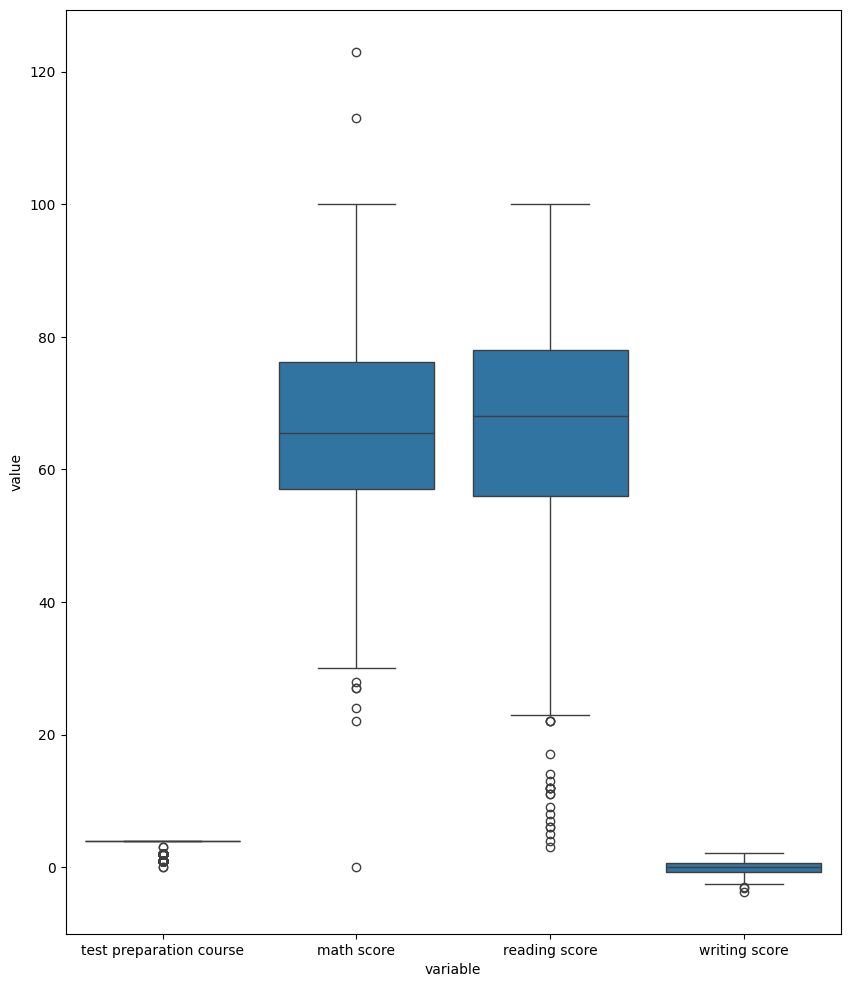

In [44]:
plt.figure(figsize=(10,12))
sns.boxplot(x="variable", y="value", data=pd.melt(dataset_new[numeric_cols]))
plt.show()

In [46]:
numeric_data = dataset_new[numeric_cols]  # Ensure this contains only numeric columns
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric, invalid parsing will be set to NaN


In [54]:
# Replace NaNs in numeric columns only with their median
dataset_new.fillna(dataset_new.select_dtypes(include='number').median(), inplace=True)


In [55]:

Q1 = dataset_new.quantile(0.25)
Q3 = dataset_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TypeError: unsupported operand type(s) for -: 'str' and 'str'